In [205]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multioutput import MultiOutputClassifier

pd.set_option('display.max_columns', None)
%matplotlib  inline 

In [206]:
train_feature = pd.read_csv(f'data/training_set_features.csv')
train_label = pd.read_csv(f'data/training_set_labels.csv')

In [207]:
train = train_feature.merge(right=train_label, on = 'respondent_id',)


In [208]:
train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [209]:
train.dtypes 

respondent_id                    int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                       object
education                       object
race                            object
sex                      

In [210]:
train.columns 

Index(['respondent_id', 'h1n1_concern', 'h1n1_knowledge',
       'behavioral_antiviral_meds', 'behavioral_avoidance',
       'behavioral_face_mask', 'behavioral_wash_hands',
       'behavioral_large_gatherings', 'behavioral_outside_home',
       'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal',
       'chronic_med_condition', 'child_under_6_months', 'health_worker',
       'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk',
       'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective',
       'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'age_group',
       'education', 'race', 'sex', 'income_poverty', 'marital_status',
       'rent_or_own', 'employment_status', 'hhs_geo_region', 'census_msa',
       'household_adults', 'household_children', 'employment_industry',
       'employment_occupation', 'h1n1_vaccine', 'seasonal_vaccine'],
      dtype='object')

In [211]:
train['sex'].unique()

array(['Female', 'Male'], dtype=object)

In [212]:
var_dis = [var for var in train.columns if len(train[var].unique())<=20 and train[var].dtypes != 'object']


In [213]:
var_obj = [x for x in train.columns if x not in var_dis and x != 'respondent_id']


In [214]:
var_dis_miss = [x for x in train.columns if train[x].isnull().sum() > 0 and x  in var_dis and x != 'respondent_id']


In [215]:
var_obj_miss = [var for var in train.columns if var in var_obj and train[var].isnull().sum() >0]
var_obj_miss

['education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'employment_industry',
 'employment_occupation']

In [216]:
target = [var for var in train_label if var != 'respondent_id']

In [217]:
## Categorical Analysis 

In [218]:
def analysis_cat (df, var):
    tmp = df.copy()
    value_counts = tmp[var].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(var)
    plt.xticks(rotation= 60)
    plt.ylabel('count')
    plt.title(f'value counts of {var}')
    plt.show()

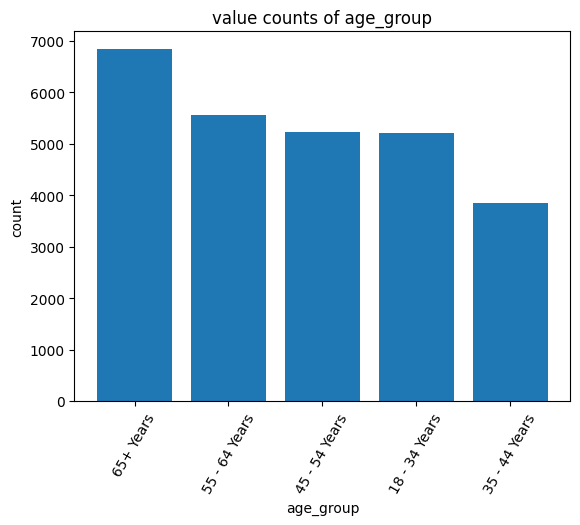

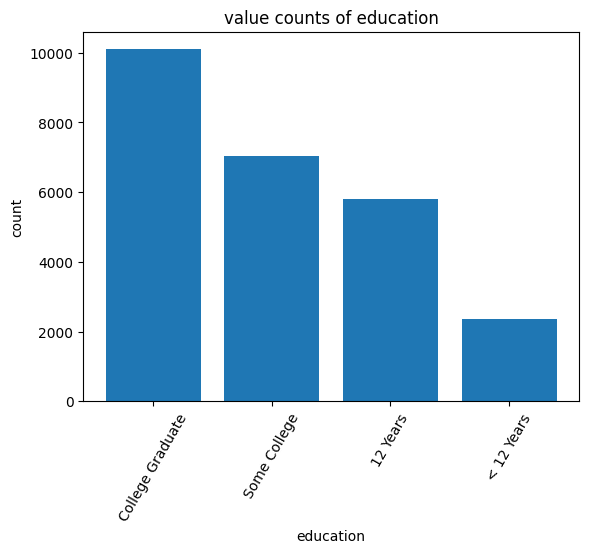

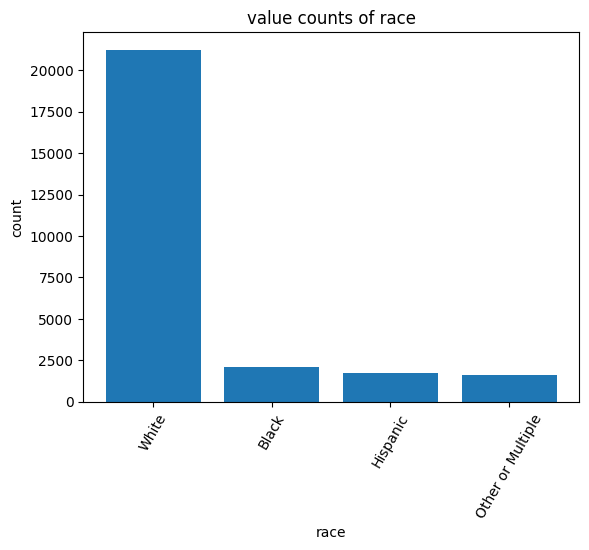

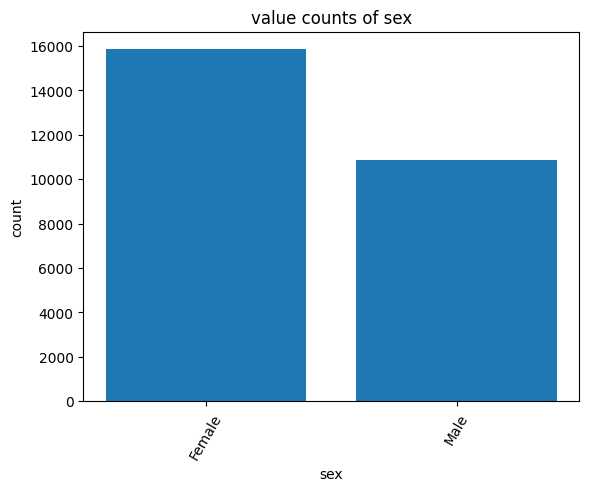

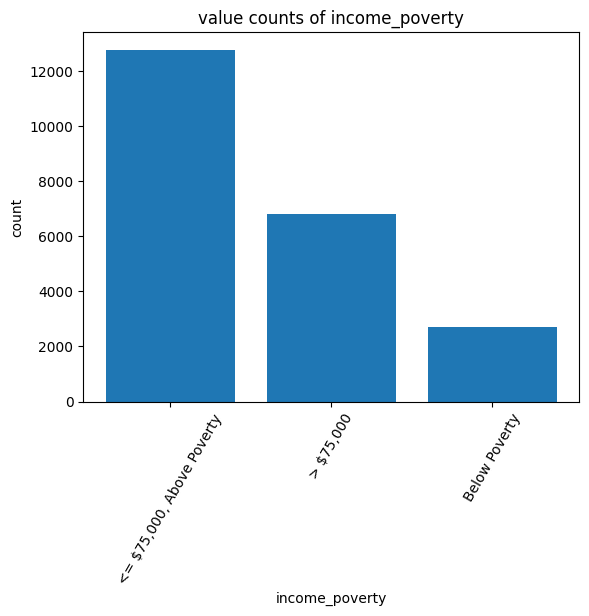

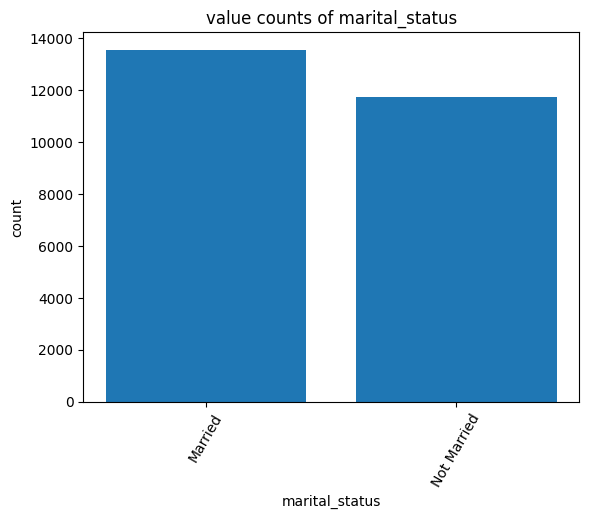

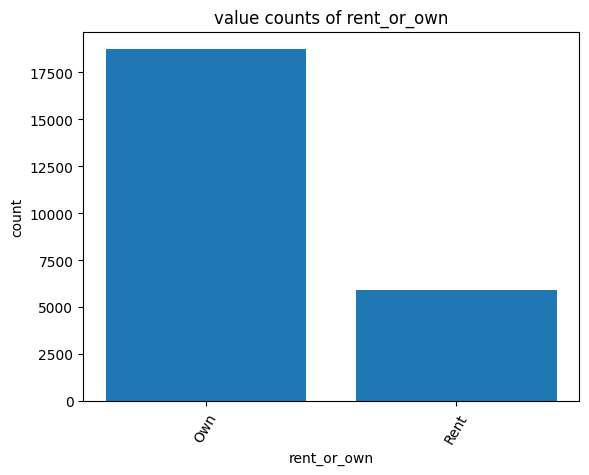

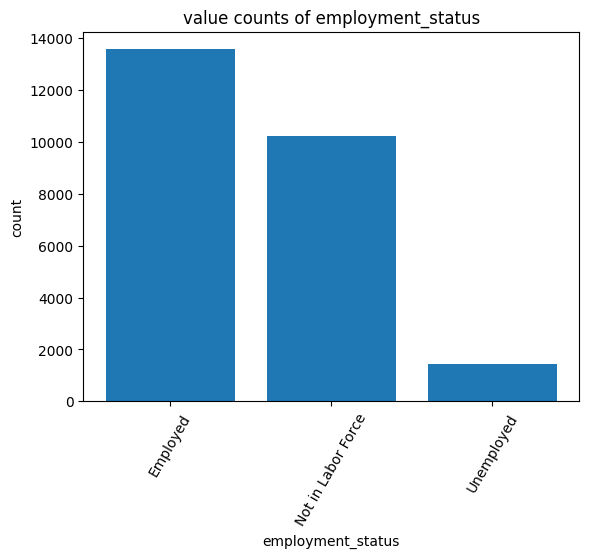

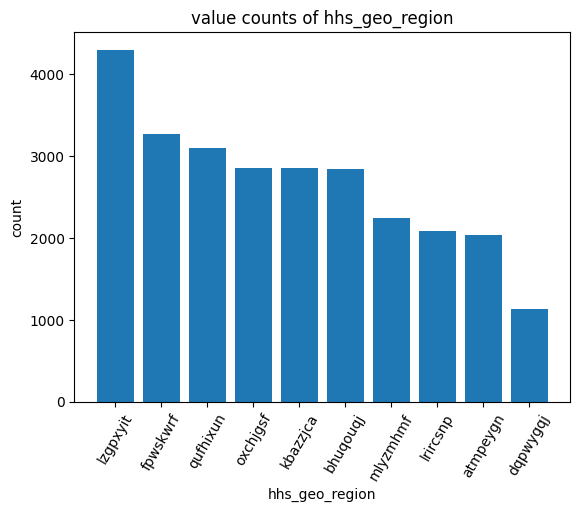

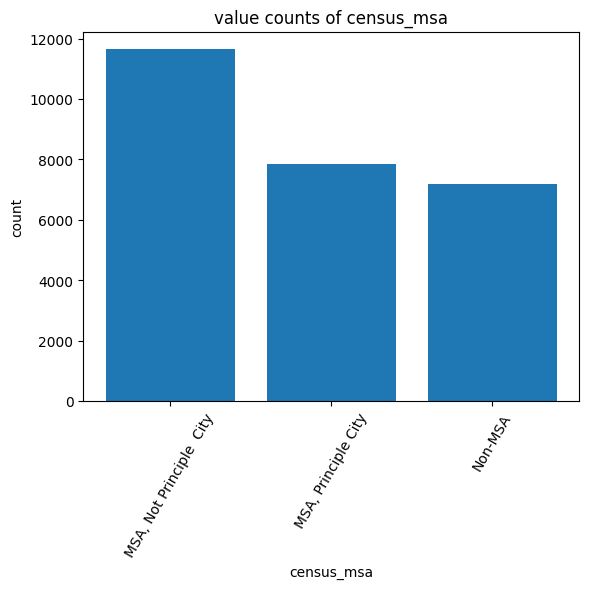

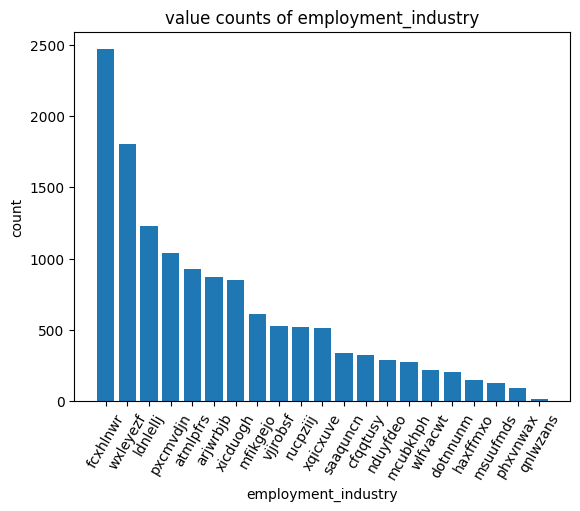

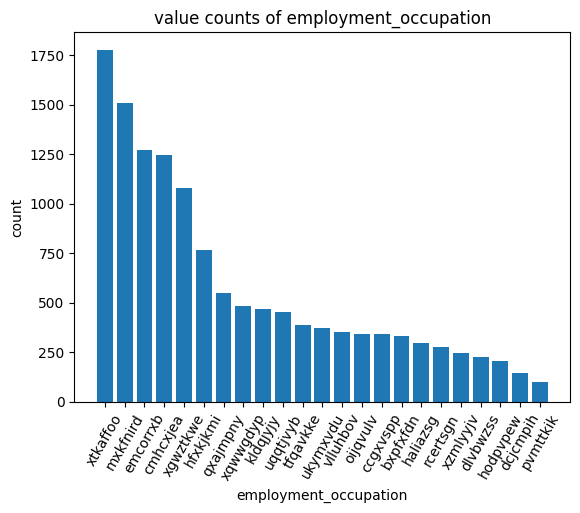

In [219]:
for col in var_obj:
    analysis_cat(train, col)

In [220]:
for col in var_obj_miss: 
    missin = train[col].value_counts().idxmin()
    train[col] = train[col].fillna(missin)

In [221]:
def replace_cat_col(train, var, target): 
    ordered_label = train.groupby([var])[target].mean().sort_values(by=target).index
    ordered_label = {k:i for i, k in enumerate(ordered_label, 0)}
    train[var] = train[var].map(ordered_label)

In [222]:
for col in var_obj:
    replace_cat_col(train, col, target)

In [223]:
train[var_obj]

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
0,4,0,3,1,0,0,1,2,8,1,16,15
1,2,1,3,0,0,0,0,1,9,0,6,3
2,0,3,3,0,1,0,1,1,6,0,8,13
3,3,1,3,1,0,0,0,2,4,2,16,15
4,1,2,3,1,1,1,1,1,6,0,18,16
...,...,...,...,...,...,...,...,...,...,...,...,...
26702,3,2,3,1,1,0,1,2,6,1,16,15
26703,0,3,3,0,1,0,0,1,1,2,19,21
26704,4,2,3,1,0,0,1,0,1,0,16,15
26705,0,2,1,1,1,1,0,1,4,1,19,20


In [239]:
# Discrete Analysis

In [224]:
def analysis_dis(df, var):
    temp = df.copy()

    temp.groupby([var])[target].mean().sort_values(by = target).plot.bar()
    plt.title(var)
    plt.show()

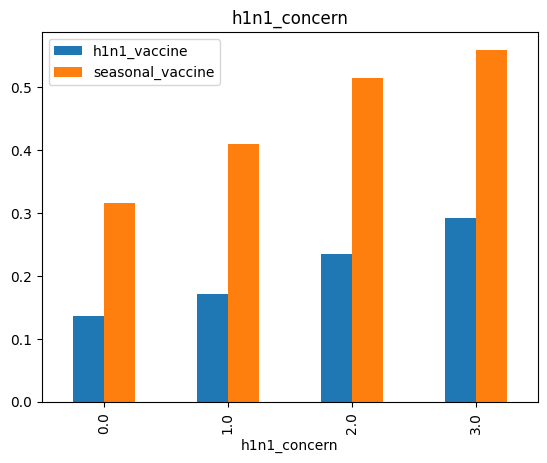

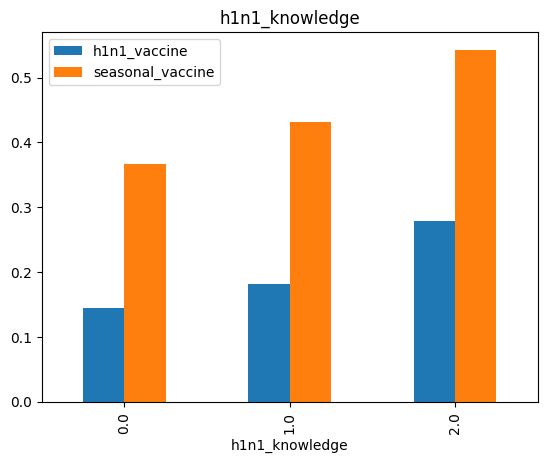

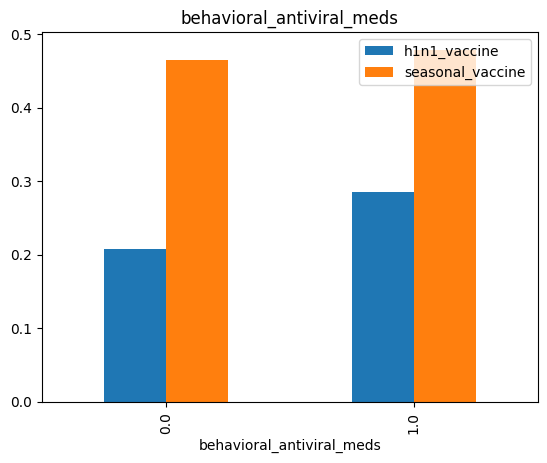

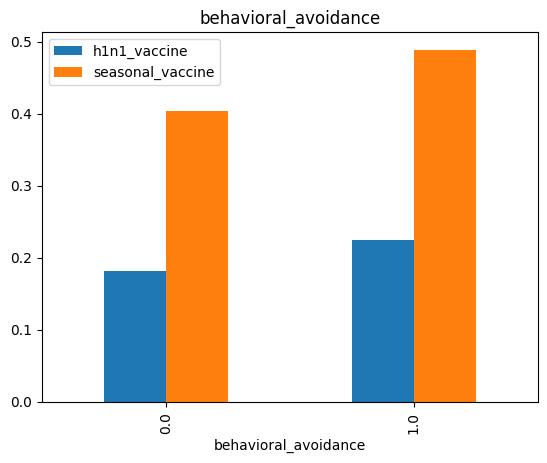

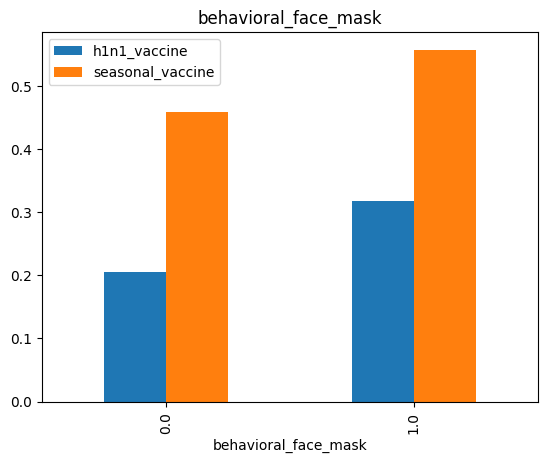

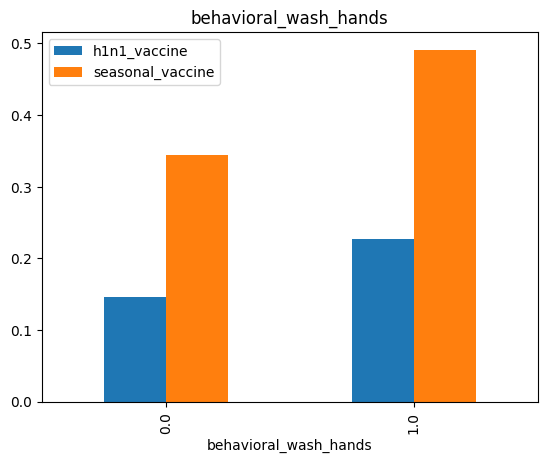

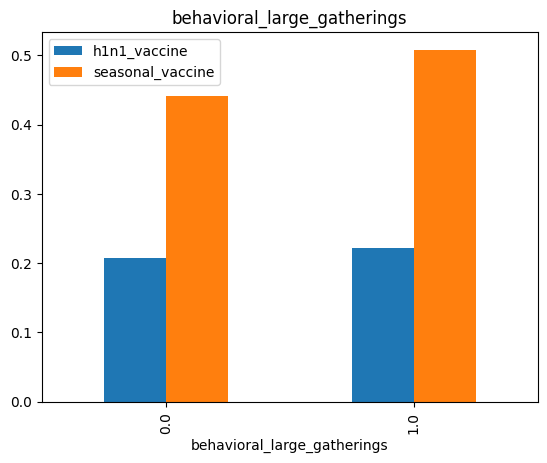

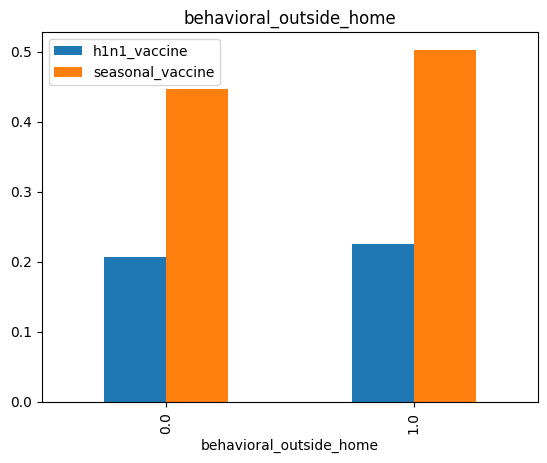

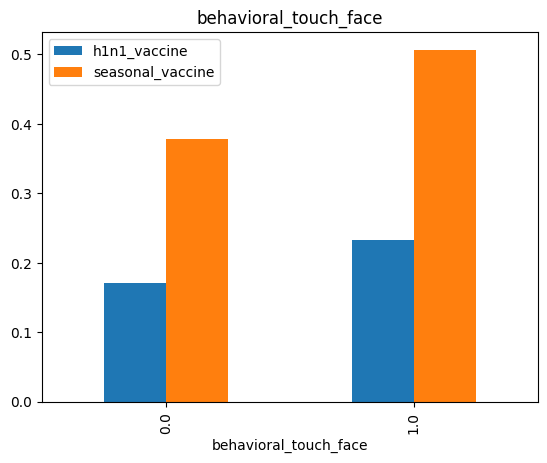

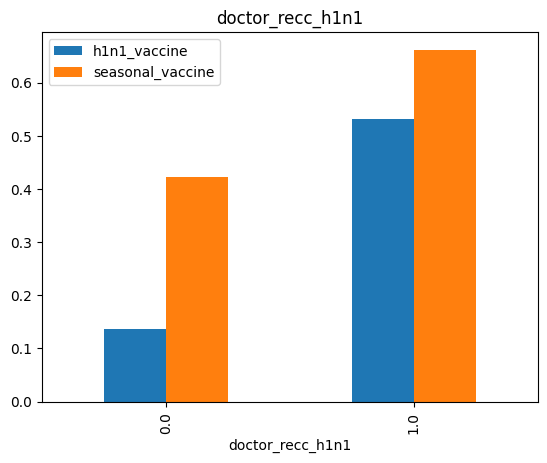

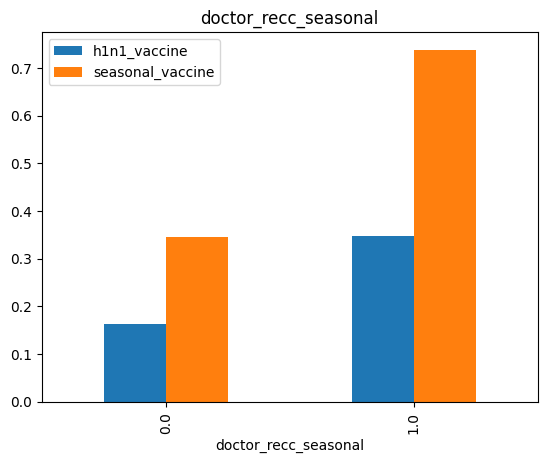

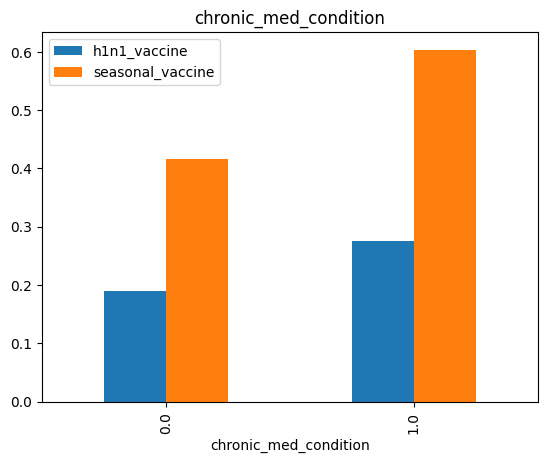

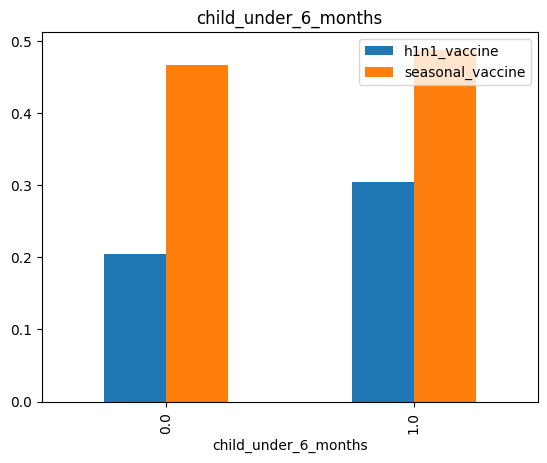

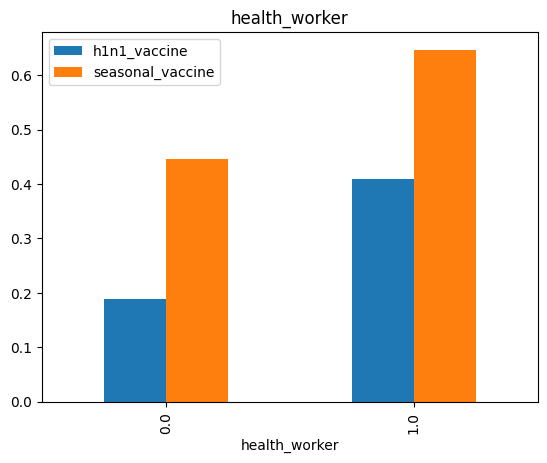

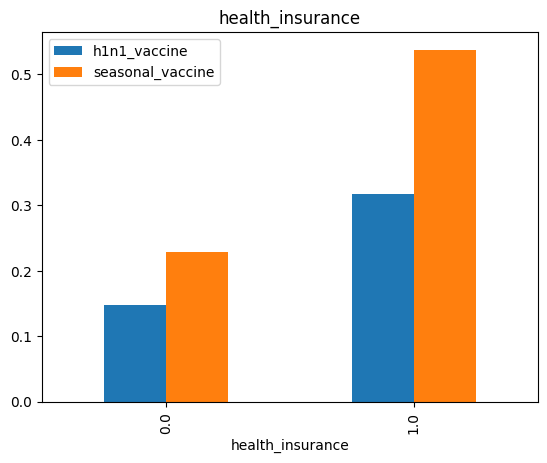

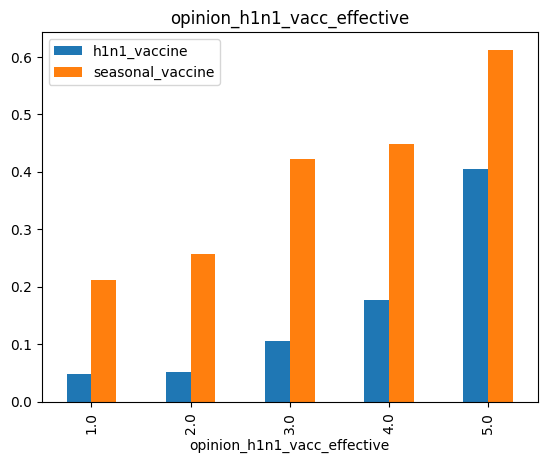

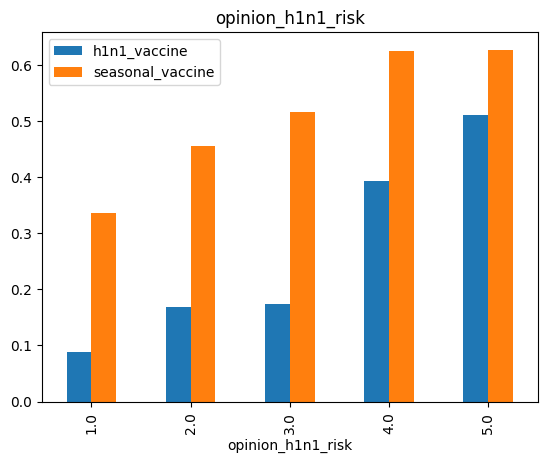

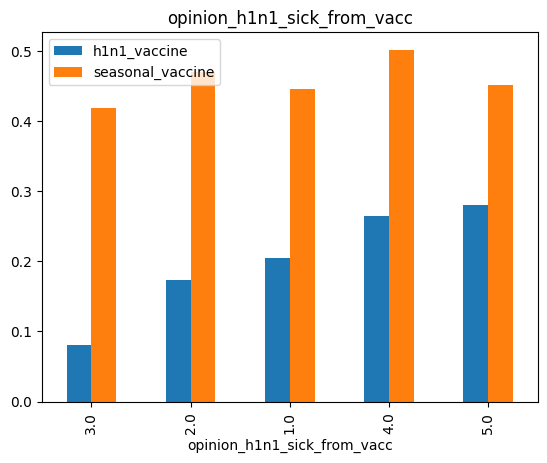

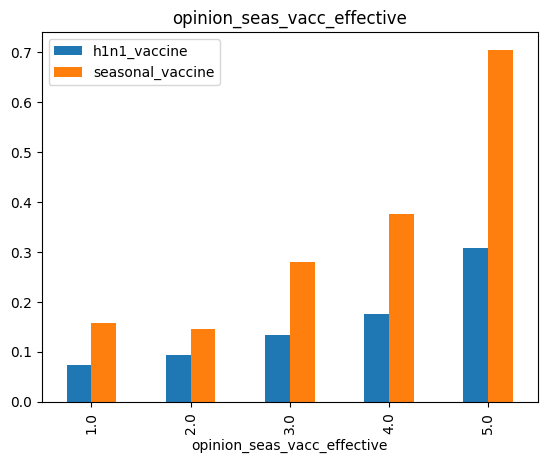

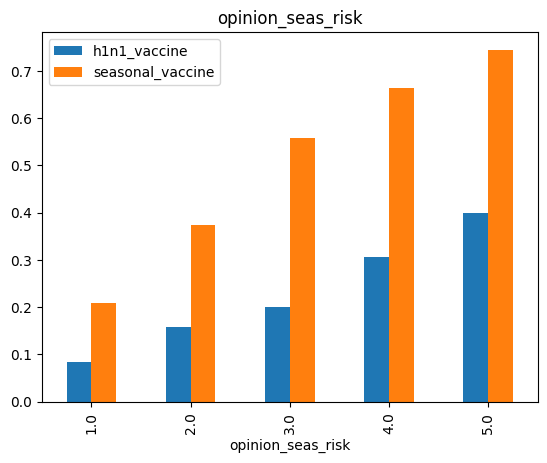

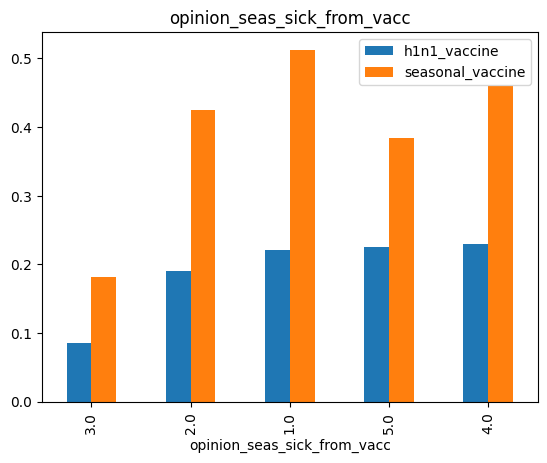

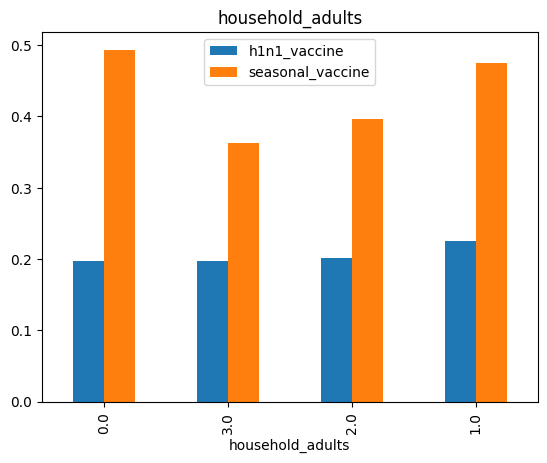

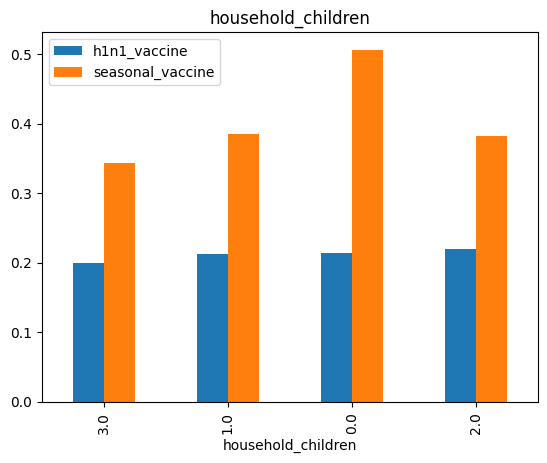

In [225]:
for var in var_dis_miss:
    analysis_dis(train, var)

In [240]:
def analysis_dis (df, var):
    tmp = df.copy()
    value_counts = tmp[var].value_counts()
    sns.barplot(x = value_counts.index, y= value_counts.values)
    plt.xlabel(var)
    plt.ylabel('count')
    plt.title(f'value counts of {var}')
    plt.show()

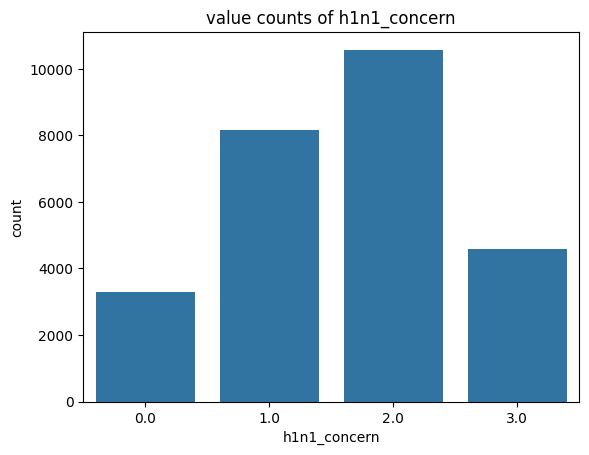

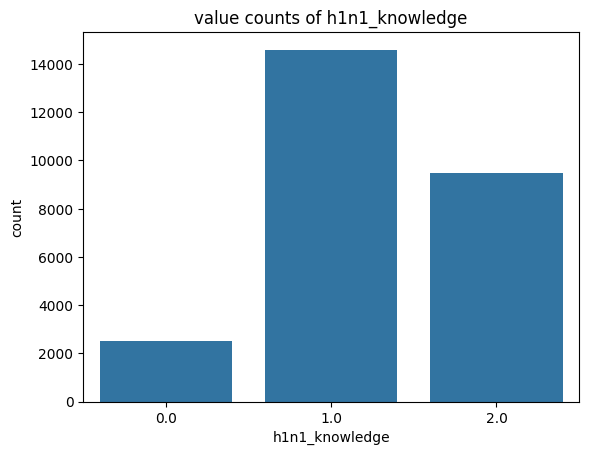

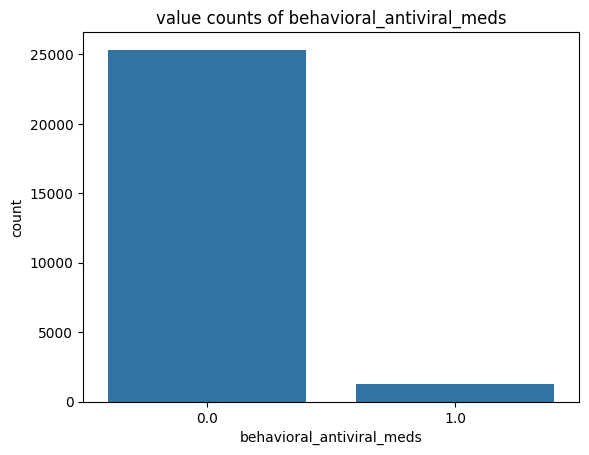

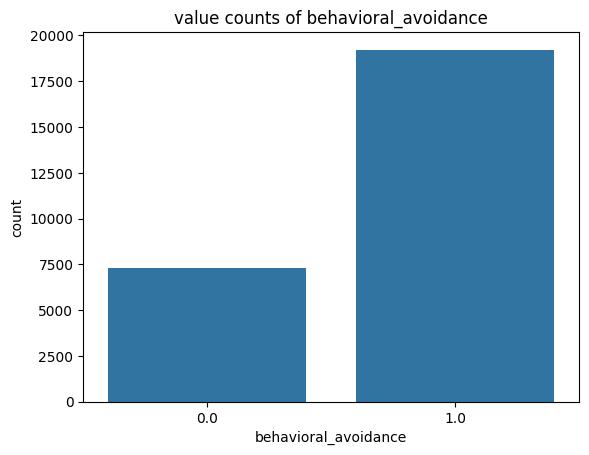

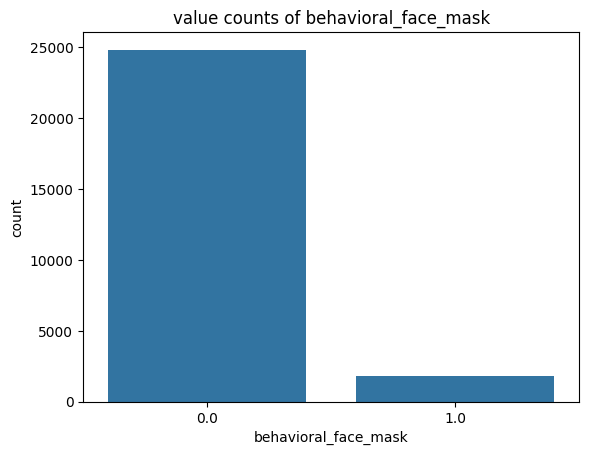

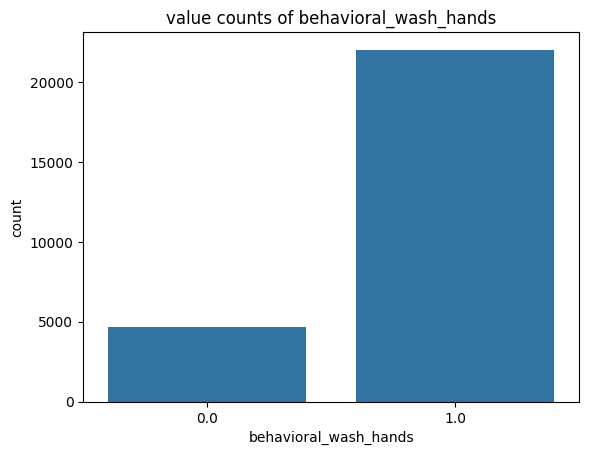

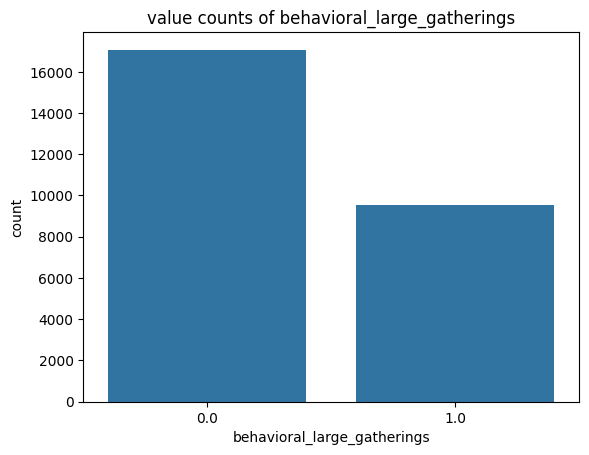

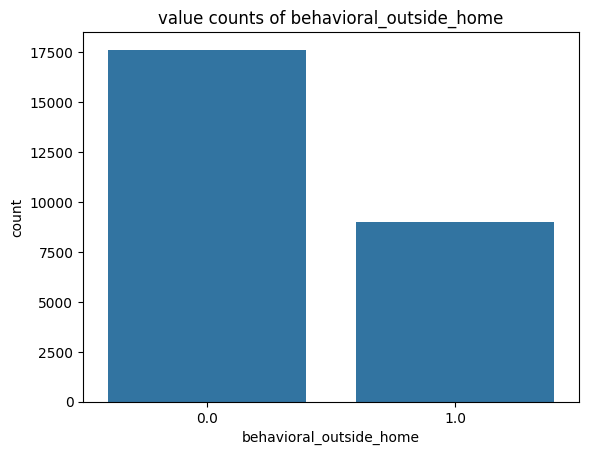

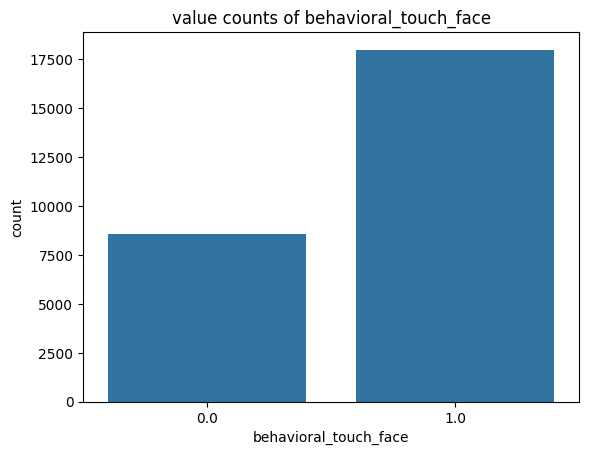

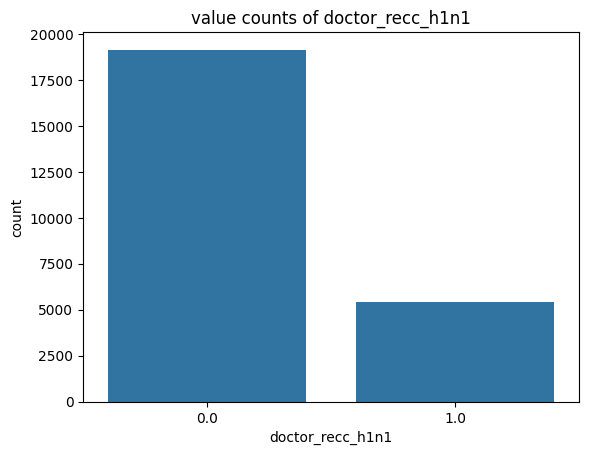

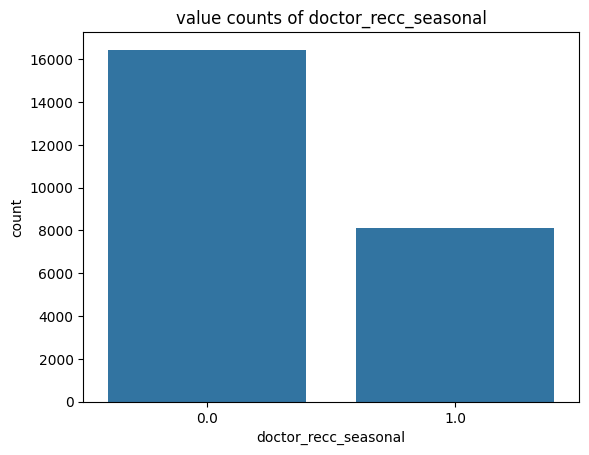

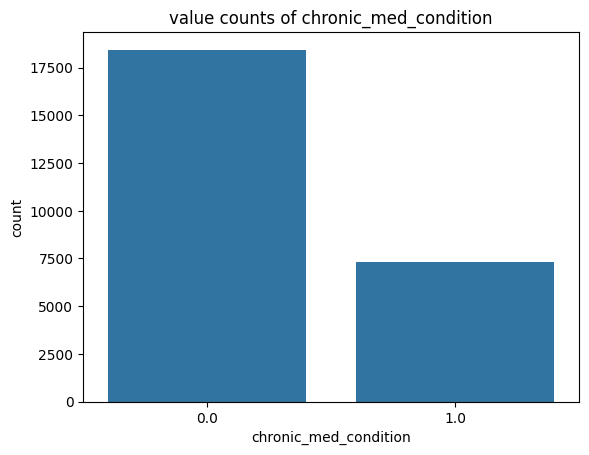

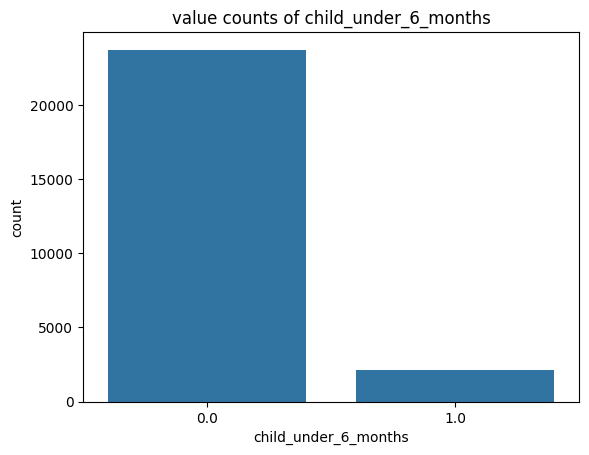

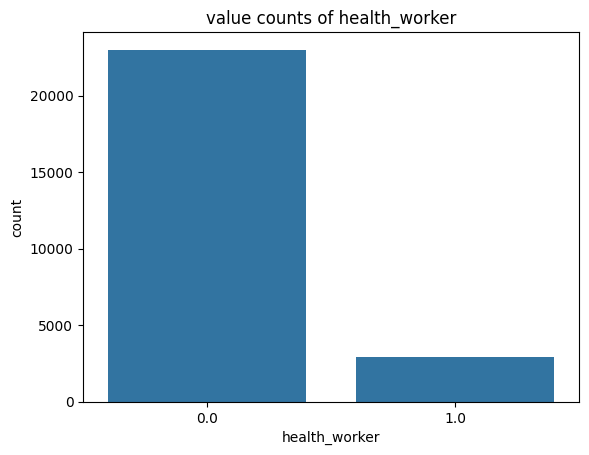

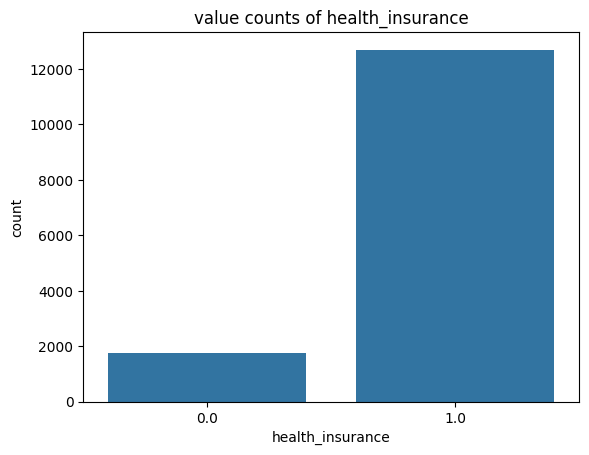

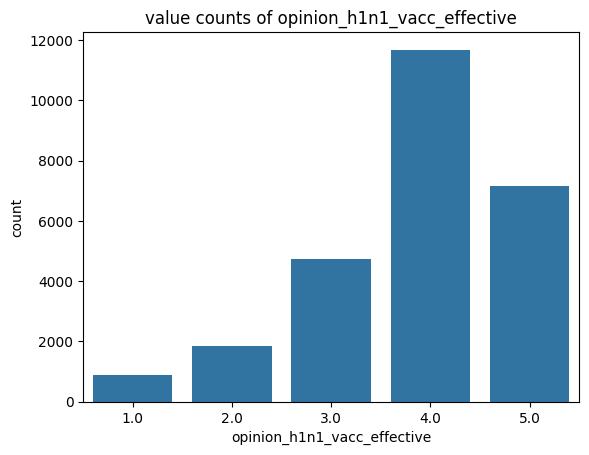

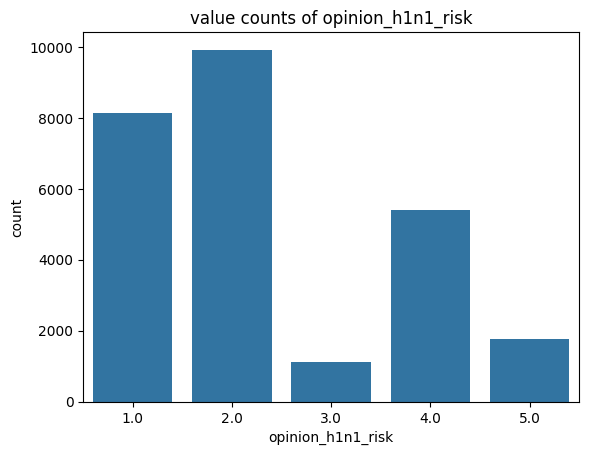

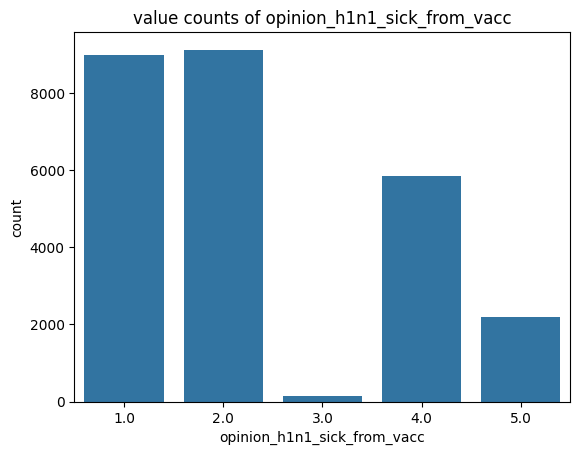

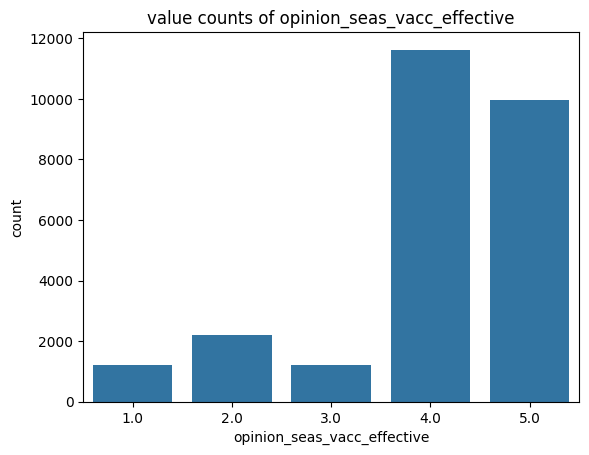

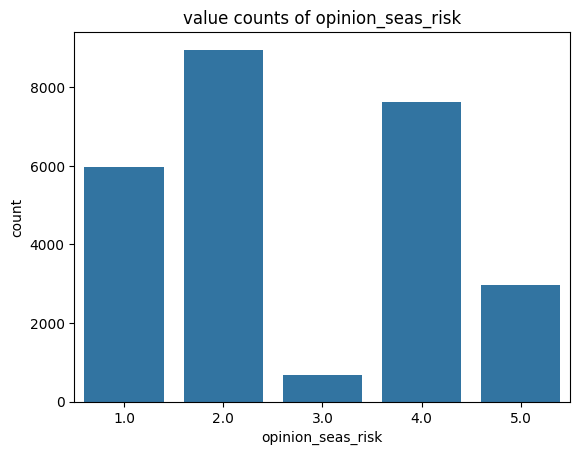

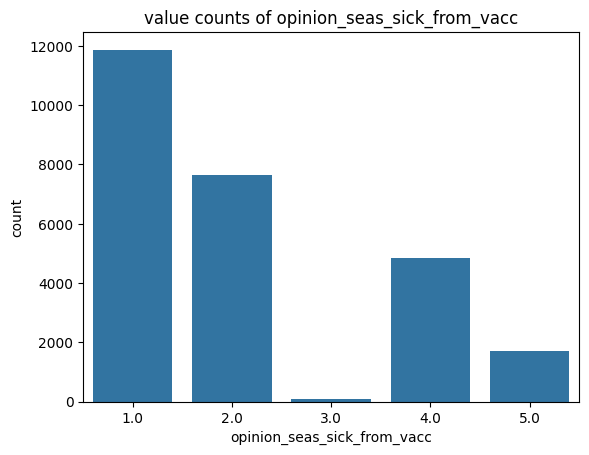

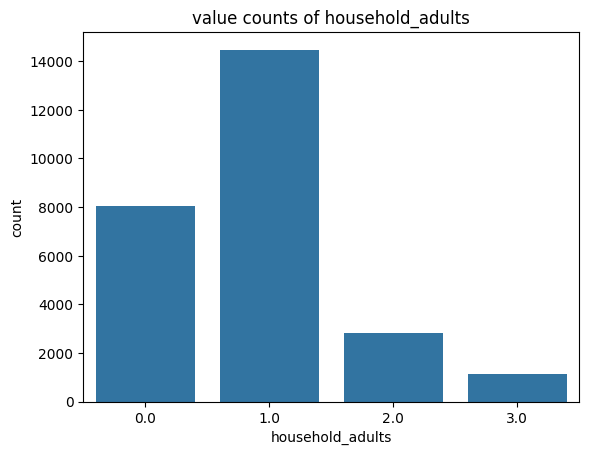

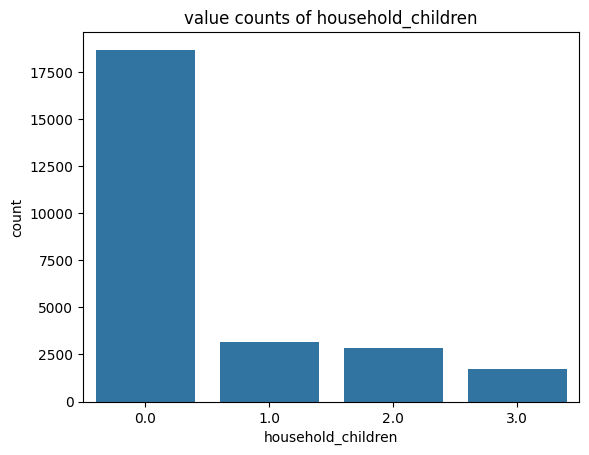

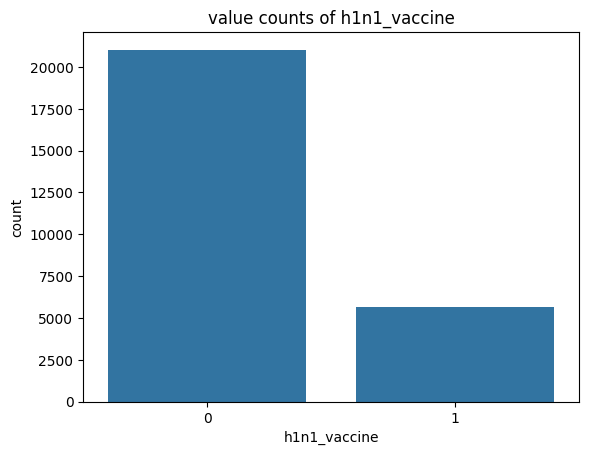

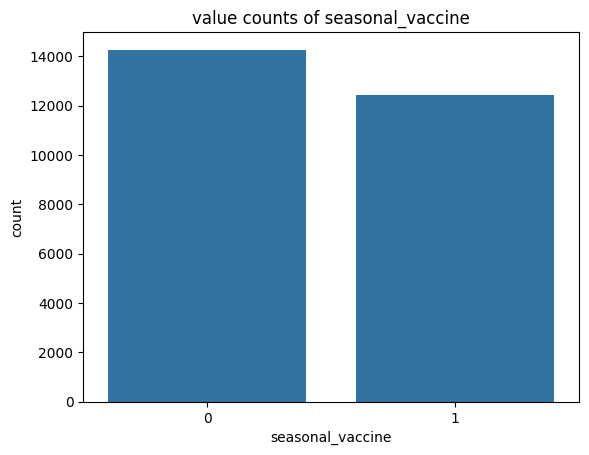

In [227]:
for col in var_dis:
    analysis_dis(train, col)

In [228]:
for col in var_dis: 
    miss = train[col].value_counts().idxmin()
    train[col] = train[col].fillna(miss)
    

In [229]:
feature = [var for var in train_feature.columns if var != 'respondent_id']

In [230]:
x_train, x_test, y_train, y_test = train_test_split(train[feature], train[target], random_state=0, test_size= 0.2)

In [231]:
from xgboost import XGBClassifier


In [232]:
multi = MultiOutputClassifier(XGBClassifier())

In [233]:
multi.fit(x_train, y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=None, ...))

In [234]:
y_pred = multi.predict(x_test)

In [235]:
from sklearn.metrics import accuracy_score, hamming_loss, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc

In [236]:
print(f'Accuraccy Score: {accuracy_score(y_test, y_pred):.2f}')
print(f"Hamming Loss: {hamming_loss(y_test, y_pred):.2f}")

Accuraccy Score: 0.68
Hamming Loss: 0.19


In [237]:
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average= 'micro')

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 0.75
Recall: 0.67
F1 Score: 0.71


AUC-ROC for Class 1: 0.716
AUC-ROC for Class 2: 0.779


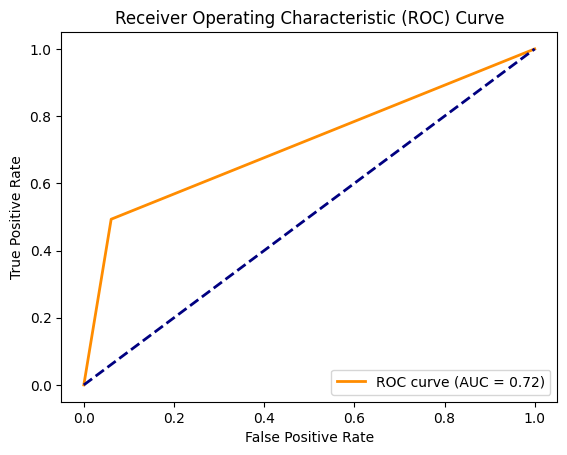

In [238]:
y_test = np.atleast_2d(y_test)
y_pred = np.atleast_2d(y_pred)
n_classes = train[target].shape[1]
auc_roc_scores = []

for i in range(n_classes):
    auc_roc = roc_auc_score(y_test[:, i], y_pred[:, i])
    auc_roc_scores.append(auc_roc)
    print(f'AUC-ROC for Class {i + 1}: {auc_roc:.3f}')

fpr, tpr, _ = roc_curve(y_test[:, 0], y_pred[:, 0])
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_roc_scores[0]:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
